### **Modelo para clasificación de diagnostico de autismo**

Para este modelo usaremos un dataset de UC Irvine Machine Learning Repository:
[Autism Screening Adult
](https://archive.ics.uci.edu/dataset/426/autism+screening+adult
)

Nuestro objetivo es poder realizar un diagnostico de autismo.

El dataset cuenta con las siguientes columnas:

| Atributo                  | Tipo             | Descripción                                                                                                                                                                                          |
|---------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| A1_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A2_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A3_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A4_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A5_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A6_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A7_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A8_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A9_Score                  | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| A10_Score                 | Binario (0, 1)   | Código de respuesta de la pregunta basada en el método de detección utilizado.                                                                                                                                   |
| age                       | Numérico         | Edad en años.                                                                                                                                                                                                     |
| gender                    | Categórico       | Género (f: femenino, m: masculino).                                                                                                                                                                               |
| ethnicity                 | Categórico       | Lista de etnias comunes en formato de texto (Blanco-Europeo, Latino, Otros, Negro, Asiático, 'Medio Oriente', Pasifika, 'Sur Asiático', Hispano, Turco, otros).                                                    |
| jundice                   | Booleano         | Indica si nació con ictericia (no: no, yes: sí).                                                                                                                                                                  |
| austim                    | Booleano         | Si algún miembro inmediato de la familia tiene un PDD (no: no, yes: sí).                                                                                                                                                                         |
| contry_of_res             | Categórico       | Lista de países de residencia en formato de texto ('Estados Unidos', Brasil, España, Egipto, 'Nueva Zelanda',....). |
| used_app_before           | Booleano         | Indica si ha usado una aplicación de detección antes (no: no, yes: sí).                                                                                                                                           |
| result                    | Numérico         | La puntuación final obtenida basada en el algoritmo de puntuación del método de detección utilizado. Esto se calculó de forma automática.                                                                             |
| age_desc                  | Categórico       | Descripción del rango de edad ('18 and more').                                                                                                                                                                    |
| relation                  | Categórico       | Quién está completando la prueba (Self: Propio, Parent: Padre/Madre, 'Health care professional': Profesional de la salud, Relative: Familiar, Others: Otros).                                                        |
| Class/ASD                 | Booleano         | Clase/TEA (NO: No, YES: Sí) - Indica si se detectó Trastorno del Espectro Autista.                                                                                                                               |


## Importamos las librerias necesarias

In [ ]:
# Importación de librerías.
import numpy as np  # Operaciones matemáticas.
import pandas as pd # Manipulación de datasets.
import seaborn as sns # Generación de gráficos.
import matplotlib.pyplot as plt # Generación de gráficos.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE


## Cargamos el Dataset

In [ ]:
# 1) Descargar el ZIP con wget
!wget -O autism_adult.zip "https://archive.ics.uci.edu/static/public/426/autism+screening+adult.zip"

# 2) Descomprimir todo en el directorio de trabajo
!unzip -o autism_adult.zip


--2025-06-16 20:03:09--  https://archive.ics.uci.edu/static/public/426/autism+screening+adult.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘autism_adult.zip’

autism_adult.zip        [ <=>                ]  43.89K  --.-KB/s    in 0.1s    

2025-06-16 20:03:09 (418 KB/s) - ‘autism_adult.zip’ saved [44940]

Archive:  autism_adult.zip
  inflating: Autism-Adult-Data.arff  
  inflating: Autism-Screening-Adult-Data Description.docx  


In [ ]:
from scipy.io import arff
import pandas as pd

def load_arff_data(file_path):
    data, meta = arff.loadarff(file_path)
    df = pd.DataFrame(data)
    for col in df.columns:
        if df[col].dtype == object:
            try:
                df[col] = df[col].str.decode('utf-8')
            except AttributeError:
                pass
    return df, meta

arff_filename = 'Autism-Adult-Data.arff'
df, meta = load_arff_data(arff_filename)

## Verificación de carga

In [ ]:
#Verificamos que haya cargado correctamente visualizando los primeros archivos
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


## Preprocesamiento y preparacion de datos

Renombramos la columna de nuestra variable objetivo para más claridad. También aprovechamos para renombrar columnas con errores tipográficos.

In [ ]:
target_variable = 'ASD_diagnosis'

In [ ]:
df.rename(columns={'Class/ASD': target_variable, 'austim': 'autism_in_family'}, inplace=True)

La columna `age_desc` parece tener siempre el mismo valor, validamos si esto es así.

In [ ]:
print(df['age_desc'].unique())

['18 and more']


Como efectivamente tiene siempre el mismo valor, decidimos eliminarla.

In [ ]:
df = df.drop('age_desc', axis=1)

Analisis de datos faltantes

In [ ]:
# 1) Crear máscaras de faltantes (NaN o “?”) por celda
mask_nan = df.isna()
mask_q   = df == '?'

# 2) Identificar filas que tienen al menos un faltante (para contar registros)
mask_faltante = (mask_nan | mask_q).any(axis=1)

total_registros = df.shape[0]
registros_faltantes = mask_faltante.sum()

# 3) Calcular, para cada columna, si hay al menos un True en la máscara de celdas
mask_por_columna = (mask_nan | mask_q).any(axis=0)

# 4) Extraer nombres de columnas donde el valor es True
cols_con_faltantes = mask_por_columna[mask_por_columna].index.tolist()

print(f'Columnas faltantes: {cols_con_faltantes}')
print(f'Cantidad de registros con NaN o "?": {registros_faltantes}')
print(f'Porcentaje de registros con NaN o "?" : {(registros_faltantes / total_registros) * 100:.5f}%')


Columnas faltantes: ['age', 'ethnicity', 'relation']
Cantidad de registros con NaN o "?": 95
Porcentaje de registros con NaN o "?" : 13.49432%


En nuestro dataset, observamos que algunos registros utilizan el valor '?' para representar datos faltantes.
Aunque el porcentaje de registros incompletos es bajo, vamos a realizar un análisis detallado de las columnas que contienen estos valores para decidir cómo tratarlos adecuadamente.

In [ ]:
from IPython.display import display
# 1) Filtrar filas que tengan al menos un NaN o un “?”
mask_nan = df.isna()
mask_q   = df == '?'
filas_con_faltantes = df[(mask_nan | mask_q).any(axis=1)]

# 2) Definir función de estilo para resaltar ambos casos
def marcar_faltante(valor):
    if pd.isna(valor) or valor == '?':
        return 'background-color: salmon'
    return ''

# 3) Mostrar la tabla en Colab resaltando NaN y “?”
display(
    filas_con_faltantes.style
        .applymap(marcar_faltante)
        .set_caption("Filas con NaN o '?'")
)

<ipython-input-10-519834348>:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(marcar_faltante)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism_in_family,contry_of_res,used_app_before,result,relation,ASD_diagnosis
4,1,0,0,0,0,0,0,1,0,0,40.000000,f,?,no,no,Egypt,no,2.000000,?,NO
12,0,1,1,1,1,1,0,0,1,0,17.000000,f,?,no,no,Bahamas,no,6.000000,?,NO
13,1,0,0,0,0,0,1,1,0,1,17.000000,m,?,no,no,Austria,no,4.000000,?,NO
14,1,0,0,0,0,0,1,1,0,1,17.000000,f,?,no,no,Argentina,no,4.000000,?,NO
19,0,0,0,0,0,0,1,1,0,1,34.000000,m,?,yes,no,United Arab Emirates,no,3.000000,?,NO
20,0,1,1,1,0,0,0,0,0,0,38.000000,m,?,no,no,United Arab Emirates,no,3.000000,?,NO
24,1,1,1,1,0,0,0,1,0,0,43.000000,m,?,no,no,Lebanon,no,5.000000,?,NO
25,0,1,1,0,0,0,0,1,0,0,24.000000,f,?,yes,no,Afghanistan,no,3.000000,?,NO
62,0,0,0,0,0,0,0,0,0,0,nan,m,?,no,no,Saudi Arabia,no,0.000000,?,NO
79,1,1,0,0,0,0,0,0,0,0,45.000000,f,?,yes,no,Jordan,no,2.000000,?,NO


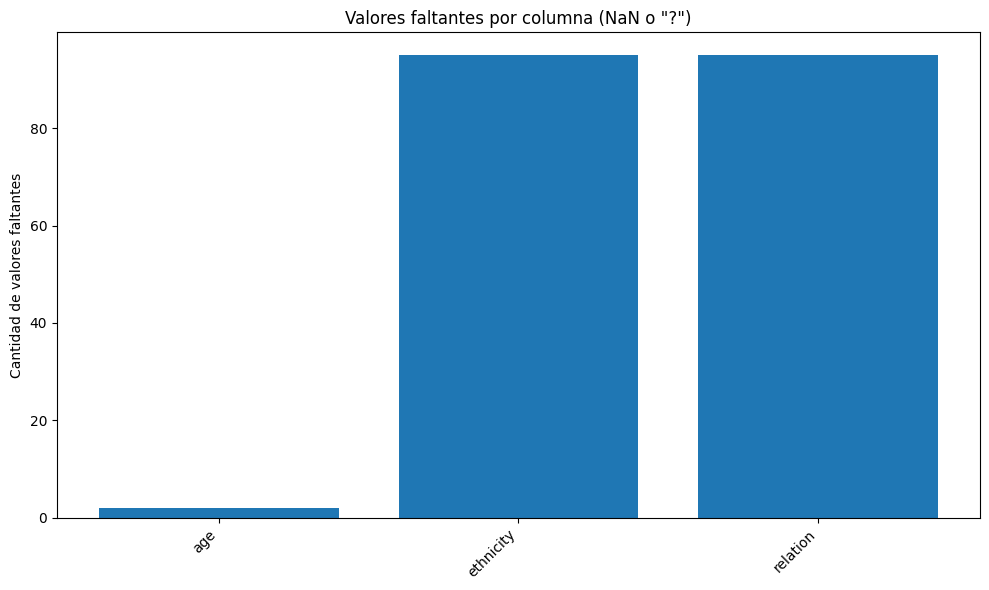

In [ ]:
# 1) Crear máscaras de faltantes (NaN o "?")
mask_nan = df.isna()
mask_q   = df == '?'
mask_faltante = mask_nan | mask_q

# 2) Calcular número de faltantes por columna
faltantes_por_col = mask_faltante.sum()

# 3) Filtrar solo columnas que tengan al menos un faltante
faltantes_por_col = faltantes_por_col[faltantes_por_col > 0]

# 4) Graficar
plt.figure(figsize=(10, 6))
plt.bar(faltantes_por_col.index, faltantes_por_col.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Valores faltantes por columna (NaN o "?")')
plt.tight_layout()
plt.show()


#Tratamiento datos faltantes de la columna Ethnicity

Notamos que varios registros de esta columna tienen el valor `?` cuando falta el valor, aca entonces podemos hacer 2 cosas:

1.   Reemplazamos el valor de los ? por el valor de la moda de la columna
2.   Reemplazamos el valor de los ? por Other

En nuestro caso, elegimos la segunda opcion para evitar distorcionar la distribucion real de las etnias


In [ ]:
# 1) Contar registros donde “ethnicity” es “?”
num_missing_eth = (df['ethnicity'] == '?').sum()
porc_missing_eth = num_missing_eth / len(df) * 100

print(f"Registros con ethnicity = '?': {num_missing_eth}")
print(f"Porcentaje de registros con ethnicity = '?': {porc_missing_eth:.2f}%")

num_missing_rel_nan = df['relation'].isna().sum()
porc_missing_rel_nan = num_missing_rel_nan / len(df) * 100

print(f"\nRegistros con relation = NaN: {num_missing_rel_nan}")
print(f"Porcentaje de registros con relation = NaN: {porc_missing_rel_nan:.2f}%")

# 2) Reemplazar “?” por others
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')

# 3) Reemplazar "others" por "Others"
df.loc[df['ethnicity'] == 'others', 'ethnicity'] = 'Others'

# (Opcional) Verificar la distribución tras el cambio
print("\nDistribución de 'ethnicity' después de reemplazar '?' por 'others':")
print(df['ethnicity'].value_counts())


Registros con ethnicity = '?': 95
Porcentaje de registros con ethnicity = '?': 13.49%

Registros con relation = NaN: 0
Porcentaje de registros con relation = NaN: 0.00%

Distribución de 'ethnicity' después de reemplazar '?' por 'others':
ethnicity
White-European     233
Others             126
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: count, dtype: int64


# Tratamiento datos faltantes de la columna Relation

Observamos que varios registros en esta columna presentan el valor '?', indicando ausencia de datos.
En este caso, optamos por reemplazar los valores faltantes por "Other" para evitar eliminar información potencialmente útil y preservar la distribución general.

In [ ]:
# 1) Contar registros donde “relation” es “?”
num_missing_rel_q = (df['relation'] == '?').sum()
porc_missing_rel_q = num_missing_rel_q / len(df) * 100

print(f"Registros con relation = '?': {num_missing_rel_q}")
print(f"Porcentaje de registros con relation = '?': {porc_missing_rel_q:.2f}%")

# 2) Reemplazar “?” por “Other”
df['relation'] = df['relation'].replace('?', 'Others')

# 3) Contar NaN
num_missing_rel_nan = df['relation'].isna().sum()
porc_missing_rel_nan = num_missing_rel_nan / len(df) * 100

print(f"\nRegistros con relation = NaN: {num_missing_rel_nan}")
print(f"Porcentaje de registros con relation = NaN: {porc_missing_rel_nan:.2f}%")

# 4) Reemplazar NaN por “Others”
df['relation'] = df['relation'].fillna('Others')

# 5) Ver distribución
print("\nDistribución de 'relation' después de reemplazos:")
print(df['relation'].value_counts())


Registros con relation = '?': 95
Porcentaje de registros con relation = '?': 13.49%

Registros con relation = NaN: 0
Porcentaje de registros con relation = NaN: 0.00%

Distribución de 'relation' después de reemplazos:
relation
Self                        522
Others                      100
Parent                       50
Relative                     28
Health care professional      4
Name: count, dtype: int64


# Tratamiento datos faltantes de la columna Age


In [ ]:
# 1) Contar registros donde “age” es “?”
num_missing_age_q = (df['age'] == '?').sum()
porc_missing_age_q = num_missing_age_q / len(df) * 100

print(f"Registros con age = '?': {num_missing_age_q}")
print(f"Porcentaje de registros con age = '?': {porc_missing_age_q:.2f}%")

# 3) Contar NaN
num_missing_age_nan = df['age'].isna().sum()
porc_missing_age_nan = num_missing_age_nan / len(df) * 100

print(f"\nRegistros con age = NaN: {num_missing_age_nan}")
print(f"Porcentaje de registros con age = NaN: {porc_missing_age_nan:.2f}%")

# 4) Reemplazar NaN por “Other”
df = df[~(df['age'].isna())]

# 5) Ver distribución
print("\nDistribución de 'age' después de reemplazos:")
print(df['age'].value_counts())


Registros con age = '?': 0
Porcentaje de registros con age = '?': 0.00%

Registros con age = NaN: 2
Porcentaje de registros con age = NaN: 0.28%

Distribución de 'age' después de reemplazos:
age
21.0     49
20.0     46
22.0     37
23.0     37
19.0     35
24.0     34
18.0     31
27.0     31
30.0     30
26.0     28
25.0     27
29.0     27
28.0     24
31.0     21
17.0     18
32.0     18
37.0     17
35.0     17
40.0     16
33.0     16
42.0     15
36.0     13
38.0     12
34.0     12
43.0     11
44.0     10
47.0      8
39.0      7
46.0      6
53.0      6
55.0      6
50.0      5
52.0      5
45.0      4
48.0      4
41.0      3
49.0      3
56.0      2
58.0      2
61.0      2
54.0      2
64.0      1
383.0     1
60.0      1
59.0      1
51.0      1
Name: count, dtype: int64


Se identificaron únicamente dos registros con valores faltantes (NaN) en la columna age, lo que representa un porcentaje muy bajo del total (aproximadamente 0,28%).
Dado que la cantidad es insignificante, se decidió eliminar estos registros del conjunto de datos.

Encontramos un registro con 383 años, lo cual puede ser atípico. elegimos eliminarlo.

In [ ]:
# Encontrar el índice del registro
index_to_drop = df[df['age'] == 383].index

# Eliminar el registro por índice
df.drop(index_to_drop, inplace=True)

# Analisis de la variable objetivo

<Axes: title={'center': 'Distribución de diagnósticos ASD'}, xlabel='ASD_diagnosis'>

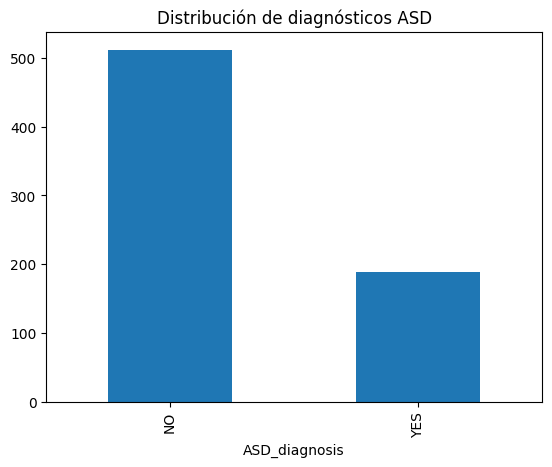

In [ ]:
df[target_variable].value_counts().plot(kind='bar', title='Distribución de diagnósticos ASD')


Convertimos yes/no en 1/0

In [ ]:
df[target_variable] = df[target_variable].str.lower().map({'yes': 1, 'no': 0})
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism_in_family,contry_of_res,used_app_before,result,relation,ASD_diagnosis
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,no,2.0,Others,0


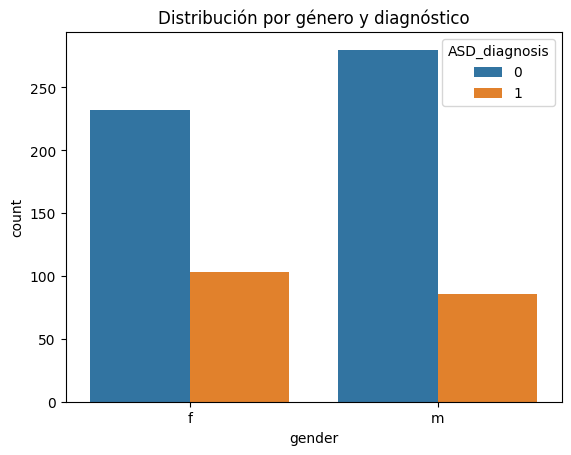

In [ ]:
sns.countplot(x='gender', hue=target_variable, data=df)
plt.title('Distribución por género y diagnóstico')
plt.show()


Observando el gráfico podemos concluir en que no existe una relación directa entre Género y el diagnóstico.

In [ ]:
df = df.drop('gender', axis=1)

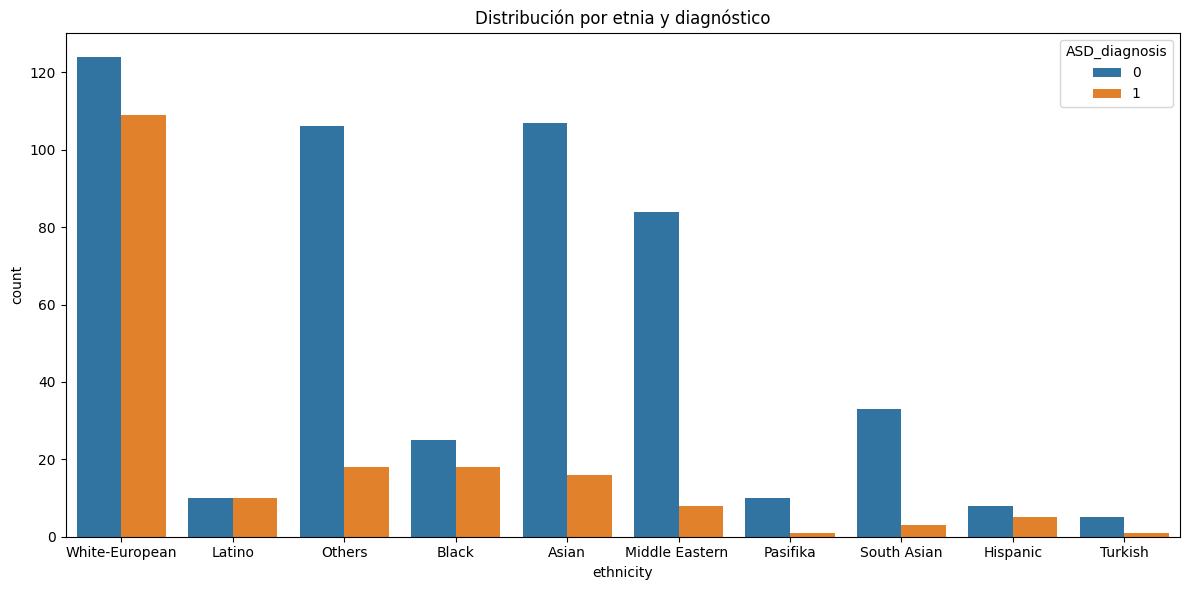

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', hue=target_variable, data=df)
plt.title('Distribución por etnia y diagnóstico')
plt.tight_layout()
plt.show()


A partir del analisis del gráfico concluimos en que no parece haber una relación directa entre etnia y diagnóstico

In [ ]:
df = df.drop('ethnicity', axis=1)

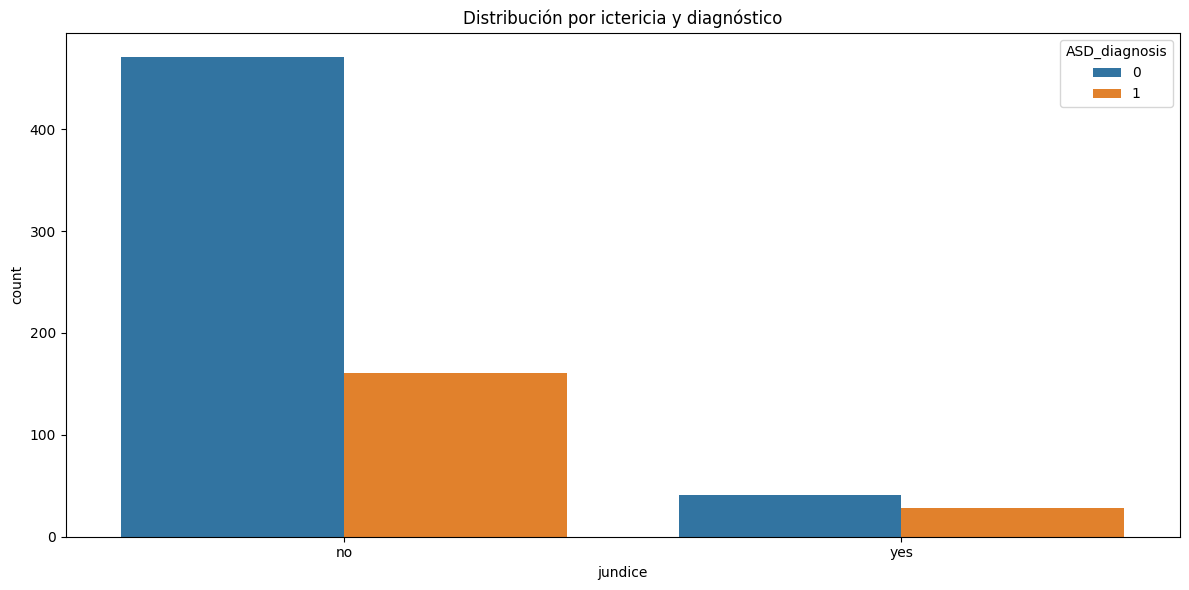

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='jundice', hue=target_variable, data=df)
plt.title('Distribución por ictericia y diagnóstico')
plt.tight_layout()
plt.show()


La mayoría de los pacientes no sufrian de ictericia al momento del nacimiento.
De aquellos que tenian ictericia al momento de su nacimiento, la mayoria dieron negativo en el test. Por lo tanto, concluimos que el no hay una correlación entre el tener ictericia y el diagnostico.


In [ ]:
df = df.drop('jundice', axis=1)

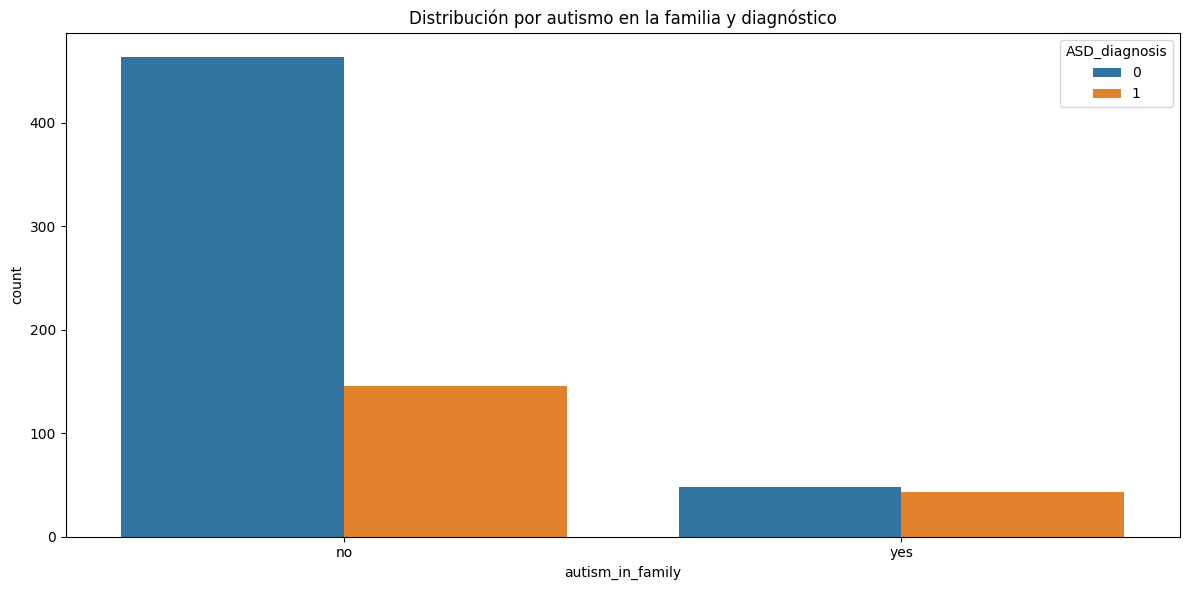

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='autism_in_family', hue=target_variable, data=df)
plt.title('Distribución por autismo en la familia y diagnóstico')
plt.tight_layout()
plt.show()


Notamos que tener un antecedente en la familia parece indicar que sea mas probable el resultado positivo en el diagnostico.

Procedemos a encodear el valor de `autism_in_family`

In [ ]:
df['autism_in_family'] = df['autism_in_family'].str.lower().map({'yes': 1, 'no': 0})


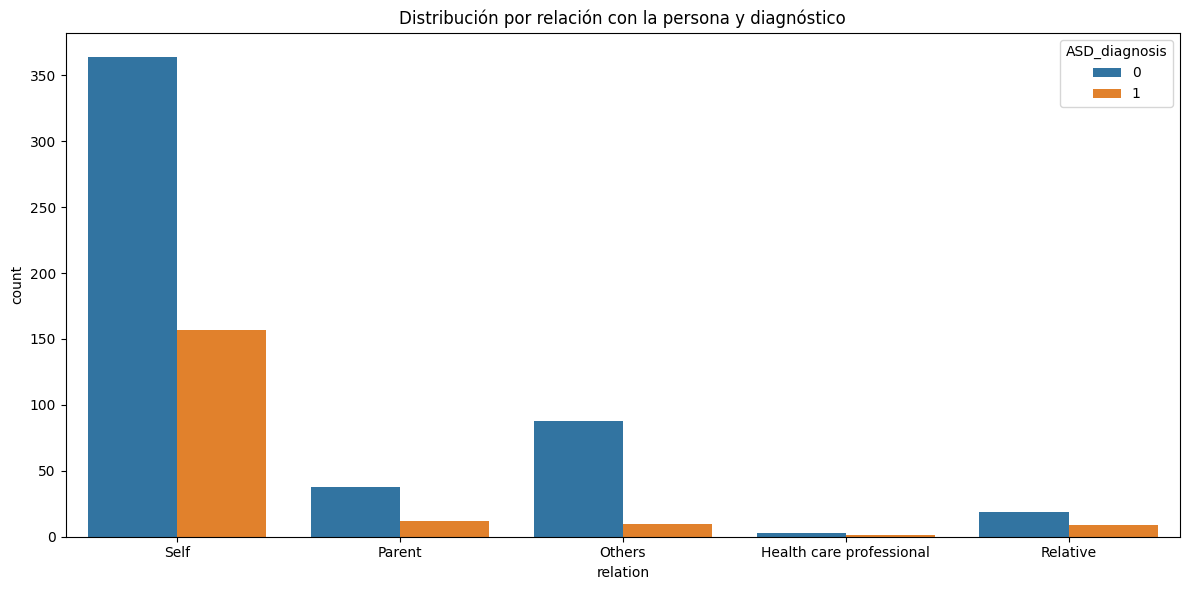

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='relation', hue=target_variable, data=df)
plt.title('Distribución por relación con la persona y diagnóstico')
plt.tight_layout()
plt.show()


Notamos que la la mayoría de los pacientes completaron ellos mismos la encuesta, con los datos observados podemos afirmar que no parece tener relación directa.

In [ ]:
df = df.drop('relation', axis=1)

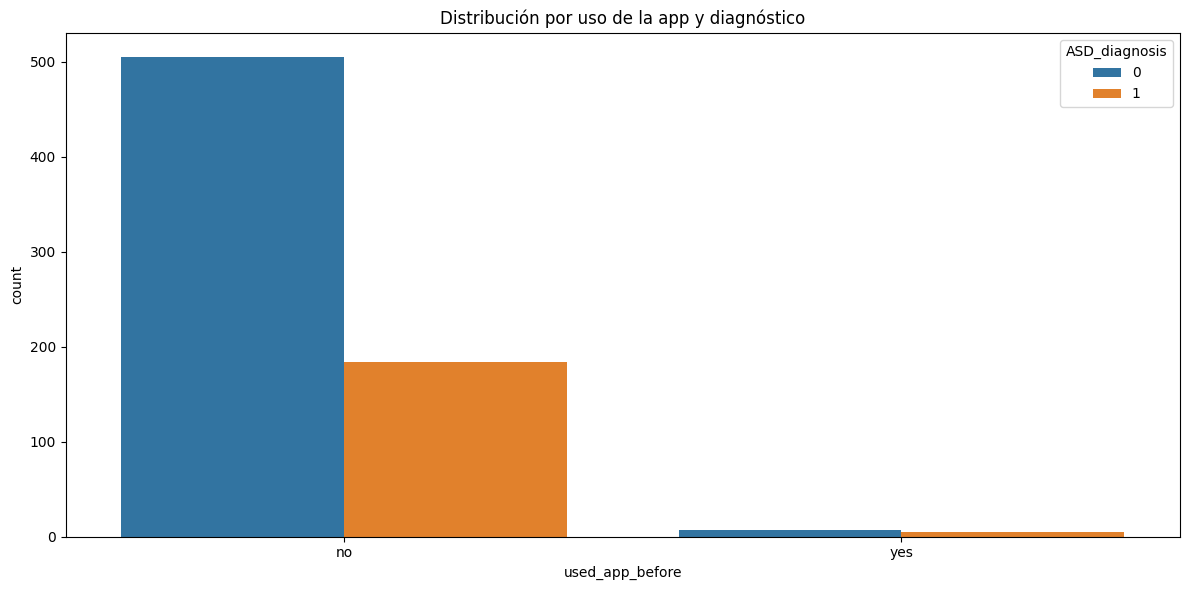

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='used_app_before', hue=target_variable, data=df)
plt.title('Distribución por uso de la app y diagnóstico')
plt.tight_layout()
plt.show()


El hecho de usar la app no tiene correlación directa con el el diagnostico en si

In [ ]:
df = df.drop('used_app_before', axis=1)

<ipython-input-28-3455288571>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['contry_of_res'].isin(top_countries)],


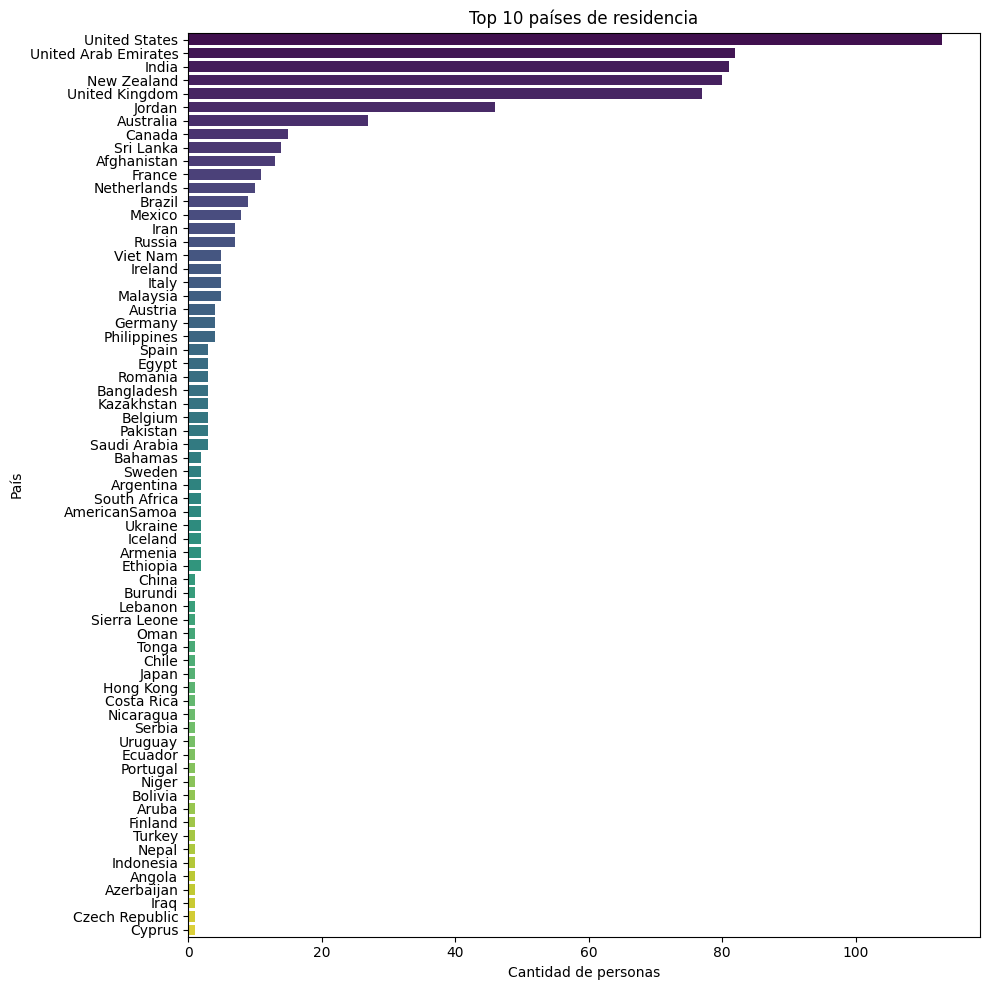

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = df['contry_of_res'].value_counts().index

plt.figure(figsize=(10, 10))
sns.countplot(data=df[df['contry_of_res'].isin(top_countries)],
              y='contry_of_res',
              order=top_countries,
              palette='viridis')

plt.title('Top 10 países de residencia')
plt.xlabel('Cantidad de personas')
plt.ylabel('País')
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop('contry_of_res', axis=1)

Notamos que la mayoría de las respuestas corresponden a unos pocos países, por lo tanto decidimos remover la columna para no distorsionar el resultado.

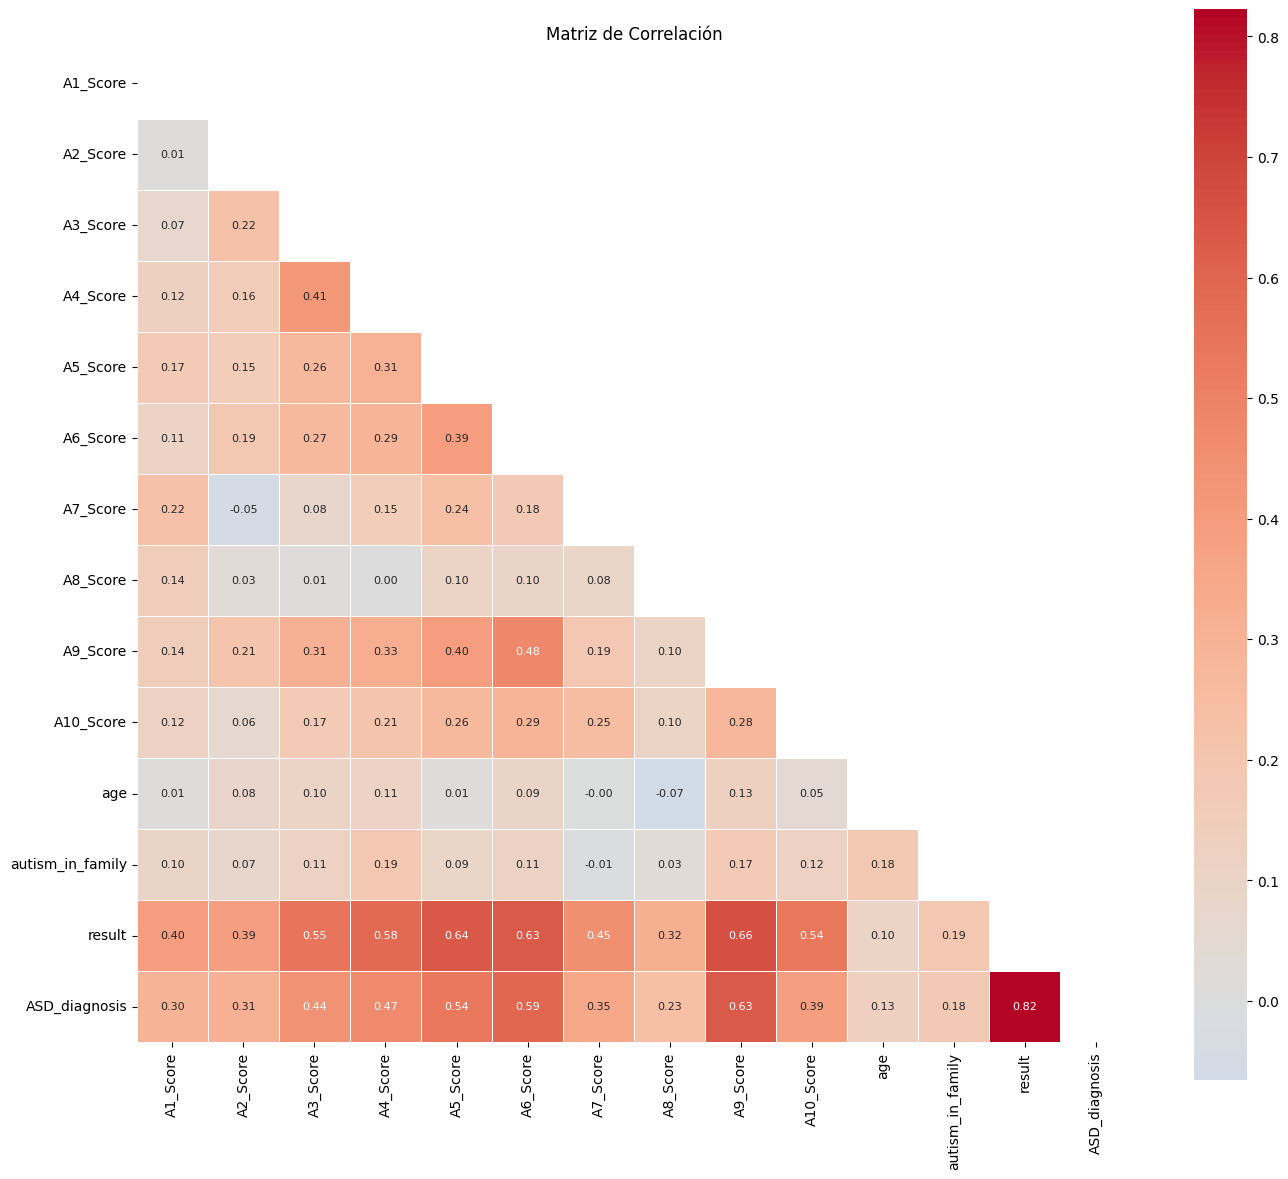

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 12))
# La máscara oculta la mitad superior de la matriz para evitar mostrar información duplicada,
# ya que la matriz de correlación es simétrica.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=0.5, fmt='.2f', annot_kws={'size': 8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Notamos que `age` tiene una correlación muy baja, por lo tanto decidimos sacarlo.

In [ ]:
df = df.drop('age', axis=1)

### Tratamiento Outliers

Cabe destacar que la mayoría de nuestros datos son booleanos (0 o 1), por lo tanto no vamos a hacer el análisis de valores átipicos sobre esos porque no tiene sentido.

In [ ]:
def marcar_outliers(dataset, columnas, factor_iqr=5):
    resultado = dataset.copy()

    columnas = [col for col in columnas if col in resultado.columns]

    for col in columnas:
        print(f"\n Análisis de la columna: {col}")
        print("-" * 50)

        # Gráficos
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))
        sns.histplot(resultado[col], kde=True, ax=axes[0], color='lightblue')
        axes[0].set_title(f'Histograma de {col}')
        axes[0].set_xlabel(col)
        axes[0].grid(True)

        sns.boxplot(x=resultado[col], ax=axes[1], color='skyblue')
        axes[1].set_title(f'Boxplot de {col}')
        axes[1].set_xlabel(col)
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

        # Estadísticas básicas
        moda = resultado[col].mode().iloc[0]
        media = resultado[col].mean()
        mediana = resultado[col].median()
        asimetria = resultado[col].skew()
        print(f"Moda: {moda:.2f} | Mediana: {mediana:.2f} | Media: {media:.2f}")
        print(f"Asimetría: {asimetria:.2f}", end=' ')
        if asimetria > 1:
            print("→ Asimetría positiva fuerte (cola derecha)")
        elif asimetria > 0.5:
            print("→ Asimetría positiva moderada")
        elif asimetria < -1:
            print("→ Asimetría negativa fuerte (cola izquierda)")
        elif asimetria < -0.5:
            print("→ Asimetría negativa moderada")
        else:
            print("→ Distribución aproximadamente simétrica")

        # Cálculo IQR y límites
        Q1 = resultado[col].quantile(0.25)
        Q3 = resultado[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - factor_iqr * IQR
        limite_superior = Q3 + factor_iqr * IQR

        # Detectar outliers
        mascara_outliers = (resultado[col] < limite_inferior) | (resultado[col] > limite_superior)
        cantidad_outliers = mascara_outliers.sum()

        if cantidad_outliers > 0:
            outliers = resultado.loc[mascara_outliers, col]
            media_outliers = outliers.mean()
            mediana_outliers = outliers.median()
            porcentaje_outliers = (cantidad_outliers / len(resultado)) * 100

            print(f"\nCantidad de outliers: {cantidad_outliers}")
            print(f"Media de outliers: {media_outliers:.2f}")
            print(f"Mediana de outliers: {mediana_outliers:.2f}")
            print(f"Porcentaje de registros considerados outliers: {porcentaje_outliers:.2f}%")
        else:
            print("\nNo se encontraron outliers con el criterio definido.")

    return resultado

In [ ]:
outliers = marcar_outliers(dataset=df,columnas=['resultado'])

Vemos que no se detectaron outliers.

# Entrenamiento del modelo usando RandomForest (RF)

Creamos un helper para mostrar los gráficos con los cuales vamos a analizar el rendimiento del modelo

In [ ]:
def plot_confusion(cm, ax, title):
    ax.imshow(cm, cmap='Blues')
    ax.set_title(title)
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(['No ASD','ASD'])
    ax.set_yticklabels(['No ASD','ASD'])
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i,j], ha='center', va='center')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')


Seleccionamos las features y el tamaño del modelo

In [ ]:
feature_cols = [
    'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
    'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score',
    'autism_in_family'
]

X = df[feature_cols].astype(int)
y = df['ASD_diagnosis'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

Aplicamos SMOTE porque notamos que tenemos un set de datos desbalanceados ya que hay muchos mas diagnosticos negativos que positivos, lo cual puede afectar al entrenamiento del modelo

In [ ]:
smote = SMOTE(sampling_strategy='all', random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes de SMOTE:", y_train.value_counts().to_dict())
print("Después de SMOTE:", y_train_sm.value_counts().to_dict())


Antes de SMOTE: {0: 409, 1: 151}
Después de SMOTE: {0: 409, 1: 409}


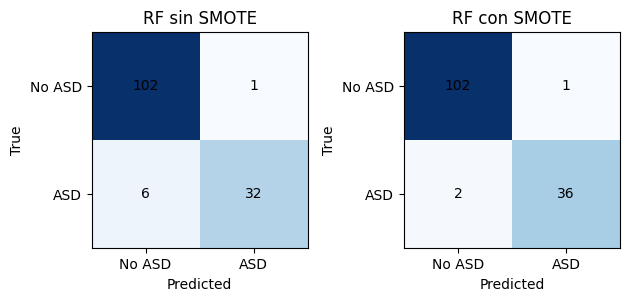


=== RF Sin SMOTE ===
               Accuracy  Precision    Recall  F1-score
Random Forest  0.950355    0.95125  0.950355  0.949195

=== RF Con SMOTE ===
               Accuracy  Precision    Recall  F1-score
Random Forest  0.978723   0.978668  0.978723  0.978633


In [ ]:
# Diccionario para guardar el resultado de las métricas
rfMetrics = {}

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# --- SIN SMOTE ---
rf.fit(X_train, y_train)
y_pred      = rf.predict(X_test)
cm_no       = confusion_matrix(y_test, y_pred)
plot_confusion(cm_no, plt.subplot(1,2,1), 'RF sin SMOTE')

# Métricas sin SMOTE
rf_no = {
    'Accuracy':  accuracy_score(y_test,  y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall':    recall_score(y_test,    y_pred, average='weighted'),
    'F1-score':  f1_score(y_test,        y_pred, average='weighted')
}
rfMetrics['sin_smote'] = rf_no

# --- CON SMOTE ---
rf.fit(X_train_sm, y_train_sm)
y_pred_sm   = rf.predict(X_test)
cm_sm       = confusion_matrix(y_test, y_pred_sm)
plot_confusion(cm_sm, plt.subplot(1,2,2), 'RF con SMOTE')

# Métricas con SMOTE
rf_sm = {
    'Accuracy':  accuracy_score(y_test,  y_pred_sm),
    'Precision': precision_score(y_test, y_pred_sm, average='weighted'),
    'Recall':    recall_score(y_test,    y_pred_sm, average='weighted'),
    'F1-score':  f1_score(y_test,        y_pred_sm, average='weighted')
}
rfMetrics['con_smote'] = rf_sm

plt.tight_layout()
plt.show()

rf_no_smote = pd.DataFrame([rfMetrics['sin_smote']], index=['Random Forest'])
rf_con_smote= pd.DataFrame([rfMetrics['con_smote']], index=['Random Forest'])

print("\n=== RF Sin SMOTE ===")
print(rf_no_smote)
print("\n=== RF Con SMOTE ===")
print(rf_con_smote)

Podemos observar que los resultados con SMOTE son mas precisos, por lo cual vamos a usar el dataset con el SMOTE aplicado